<a href="https://colab.research.google.com/github/LuisGuFer/Poo/blob/main/Copia_de_ia_componente_practico_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


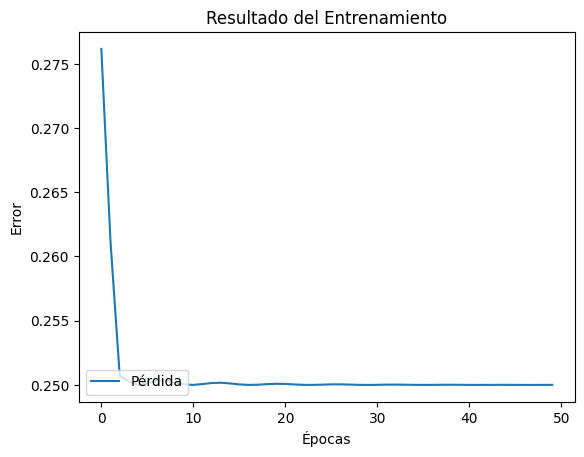

In [ ]:
# PUERTA XOR usando una red neuronal (MLP)
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Dataset de entrenamiento para la puerta XOR
x_train = np.array([[0,0],[0,1],[1,0],[1,1]], dtype="float32")
y_train = np.array([[0],[1],[1],[0]], dtype="float32")

# Modelo MLP (Perceptrón Multicapa)
model = keras.Sequential()
model.add(layers.Dense(2, input_dim=2, activation='relu'))  # Capa oculta
model.add(layers.Dense(1, activation='sigmoid'))            # Capa de salida

# Configuración del modelo
model.compile(optimizer=keras.optimizers.Adam(0.1),
              loss='mean_squared_error',
              metrics=['accuracy'])

# Entrenamiento del modelo
fit_history = model.fit(x_train, y_train, epochs=50, batch_size=4, verbose=0)

# Gráfico de la pérdida (loss)
loss_curve = fit_history.history['loss']
plt.plot(loss_curve, label='Pérdida')
plt.legend(loc='lower left')
plt.title('Resultado del Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.show()

In [ ]:
# Clasificación Supervisada
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Cargar dataset real (flores Iris)
iris = load_iris()
X, y = iris.data, iris.target

# 2. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Entrenar modelo supervisado (KNN)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# 4. Evaluar
y_pred = model.predict(X_test)
print("Exactitud del modelo:", accuracy_score(y_test, y_pred))

# 5. Predicción con nuevos datos
nueva_flor = [[5.1, 3.5, 1.4, 0.2]]
print("Predicción para la flor nueva:", iris.target_names[model.predict(nueva_flor)][0])



Exactitud del modelo: 1.0
Predicción para la flor nueva: setosa


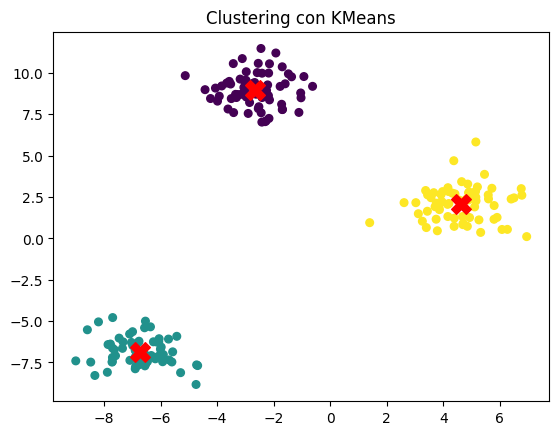

In [ ]:
# Clustering (aprendizaje NO supervisado)
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Crear datos artificiales
X, _ = make_blobs(n_samples=200, centers=3, random_state=42)

# 2. Entrenar modelo no supervisado
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 3. Visualizar resultados
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200)
plt.title("Clustering con KMeans")
plt.show()


In [ ]:
# Red Neuronal Simple - Backpropagation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# 1. Datos de entrenamiento (problema XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# 2. Crear red neuronal
model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)),  # capa oculta
    Dense(1, activation='sigmoid')                  # capa de salida
])

# 3. Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Entrenar el modelo
model.fit(X, y, epochs=500, verbose=0)

# 5. Evaluar predicciones
print("Predicciones XOR:")
print(X, "\n", model.predict(X).round())


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Predicciones XOR:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0 0]
 [0 1]
 [1 0]
 [1 1]] 
 [[0.]
 [1.]
 [1.]
 [0.]]
